# The purpose of this is to provide a time-series forecast model to predict if the number of positives a country/territory will receive within the next number of days will increase or decrease

> data from: https://www.ecdc.europa.eu/en/publications-data/download-todays-data-geographic-distribution-covid-19-cases-worldwide

In [1]:
# Import custom Time_Series python library with function definitions and other imports
%run ./Time_Series.ipynb

## Read, Mungle, and Plot Data

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


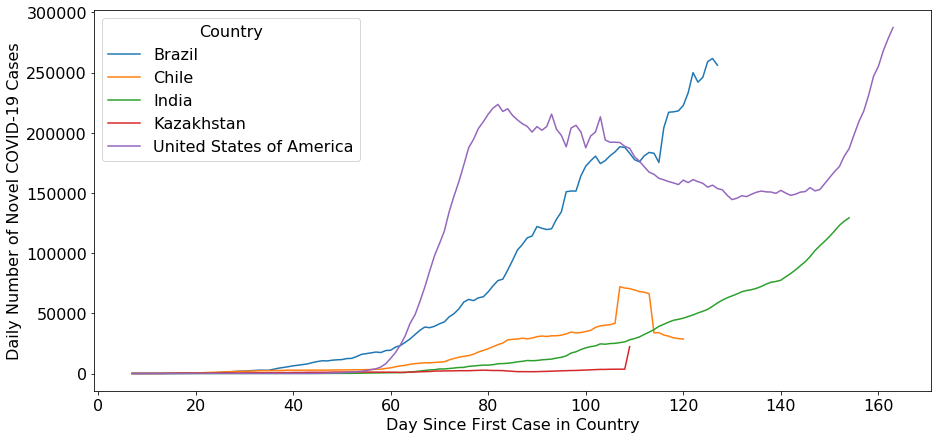

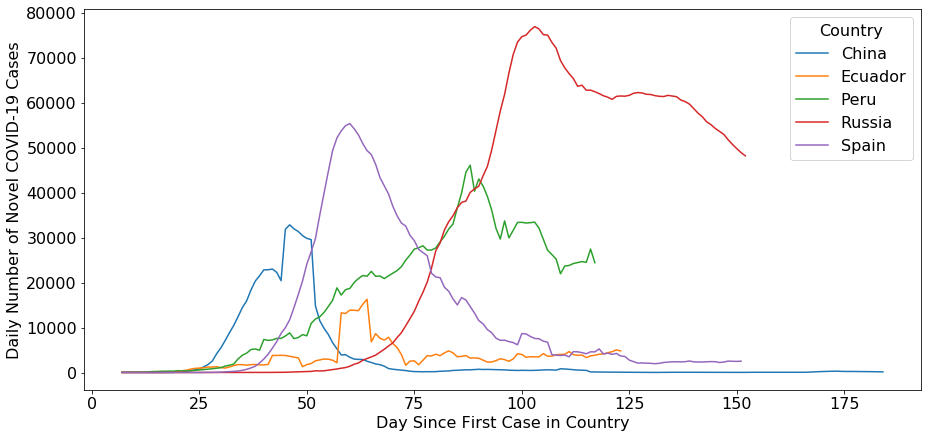

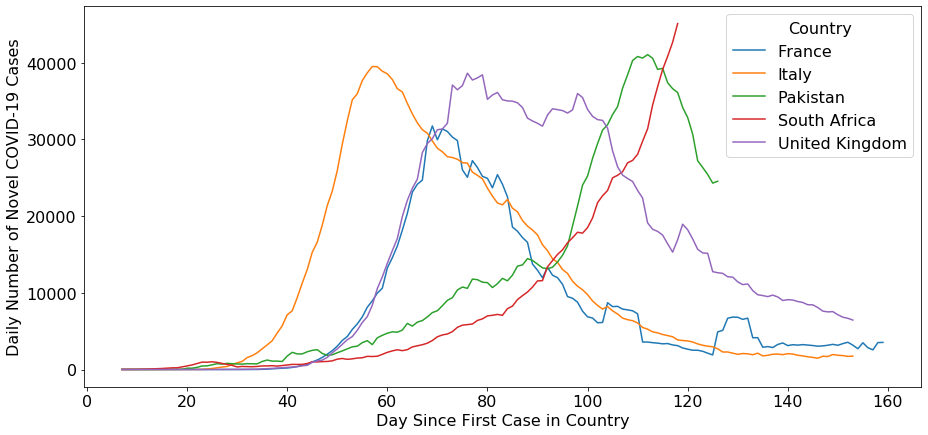

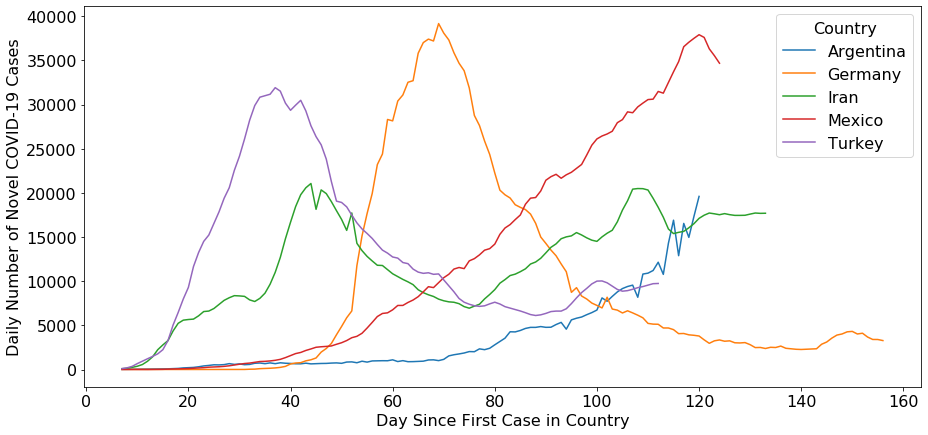

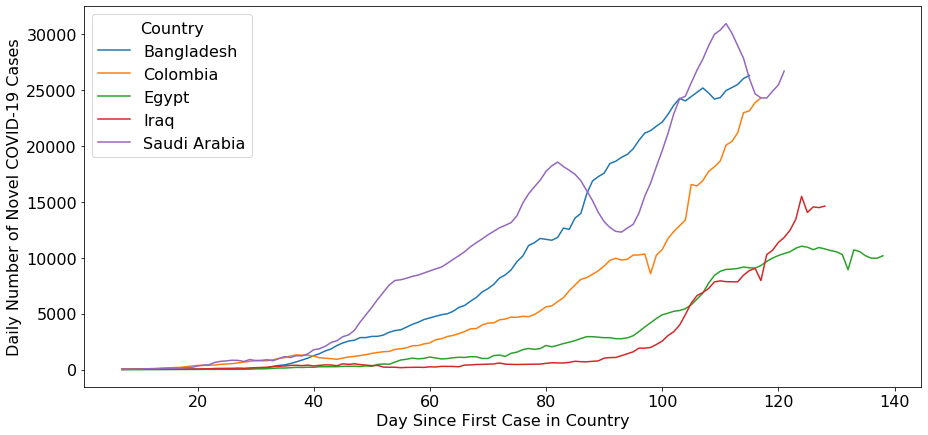

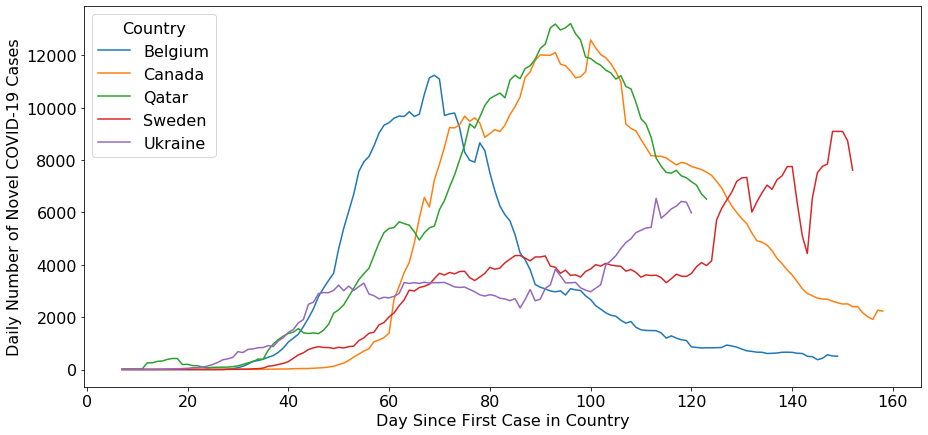

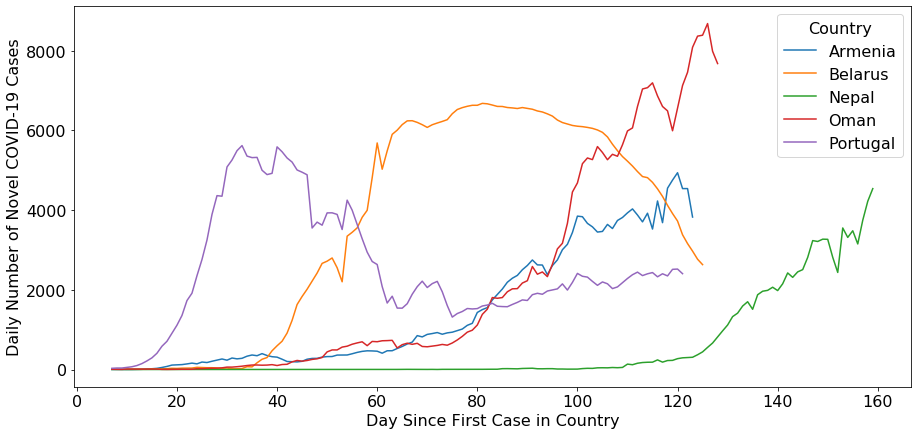

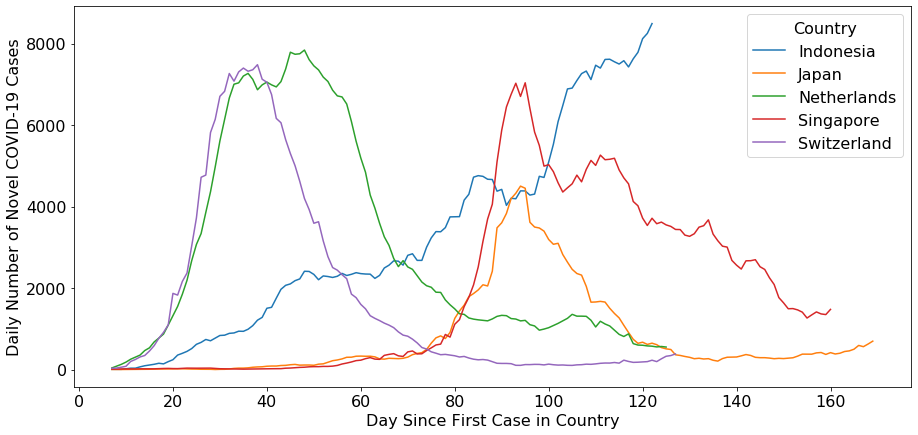

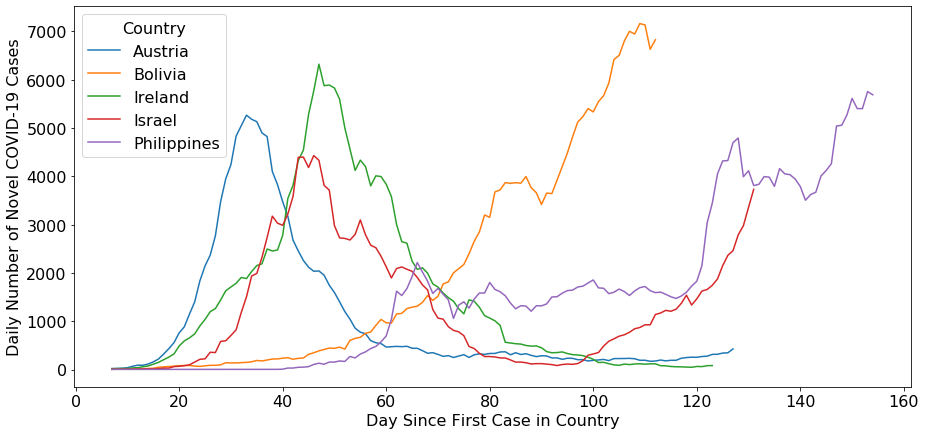

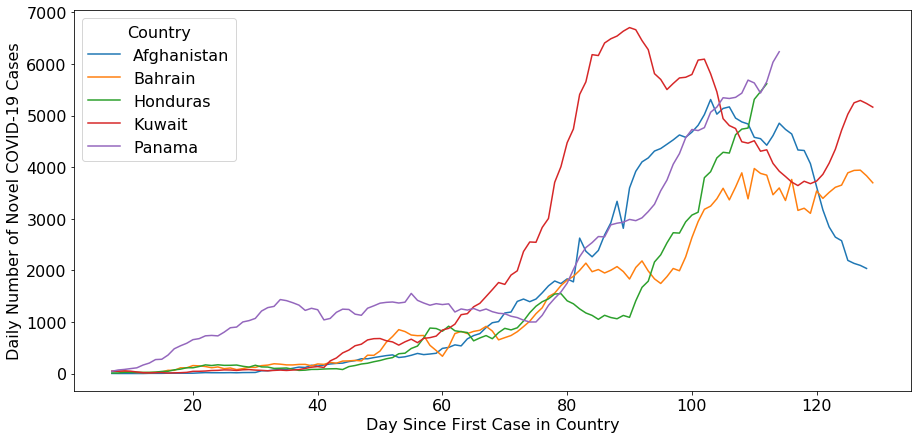

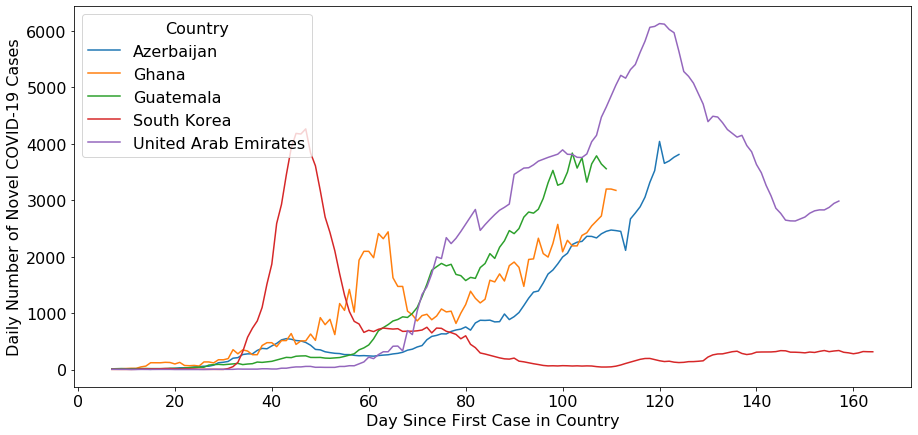

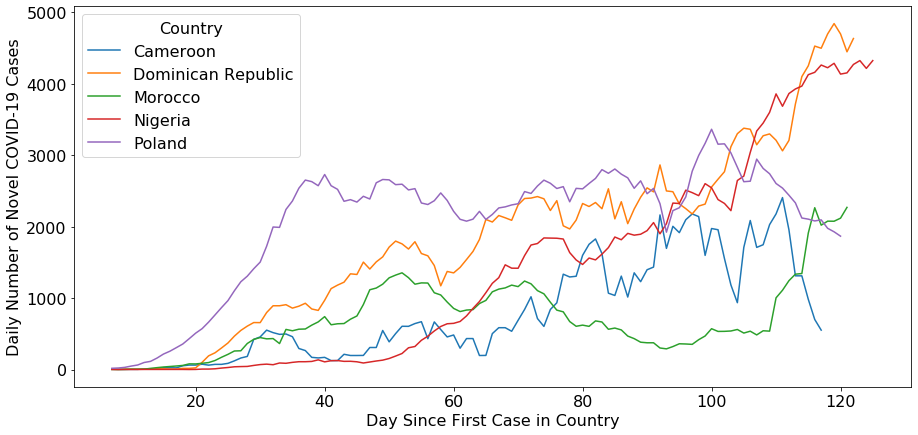

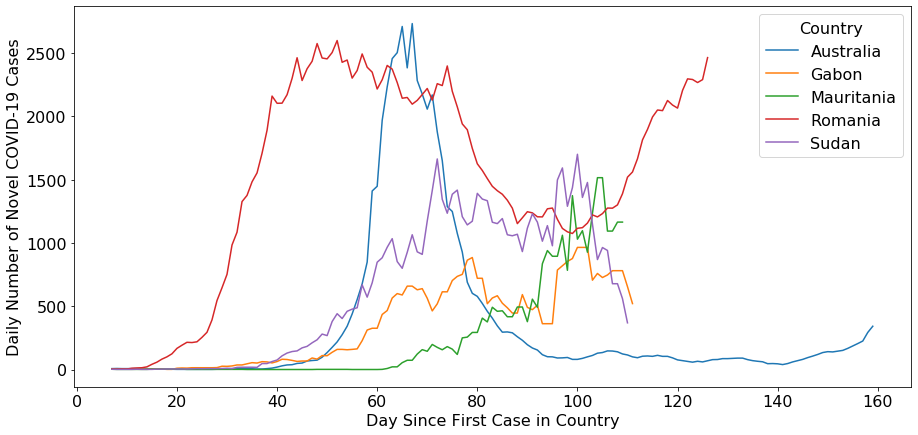

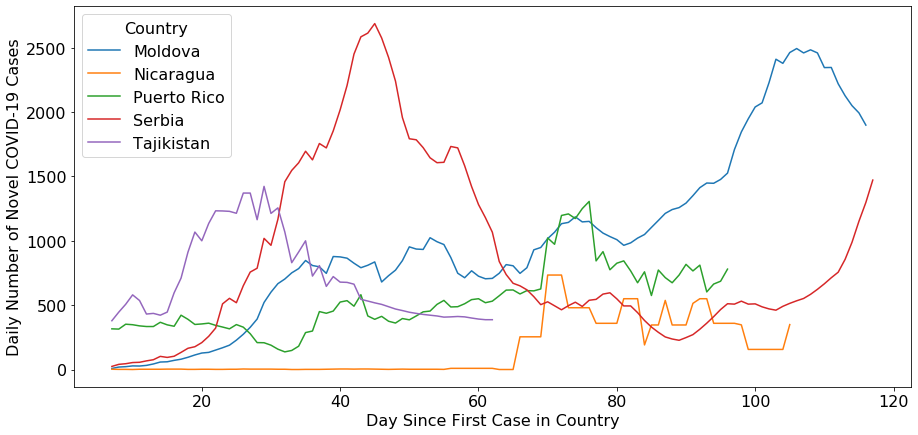

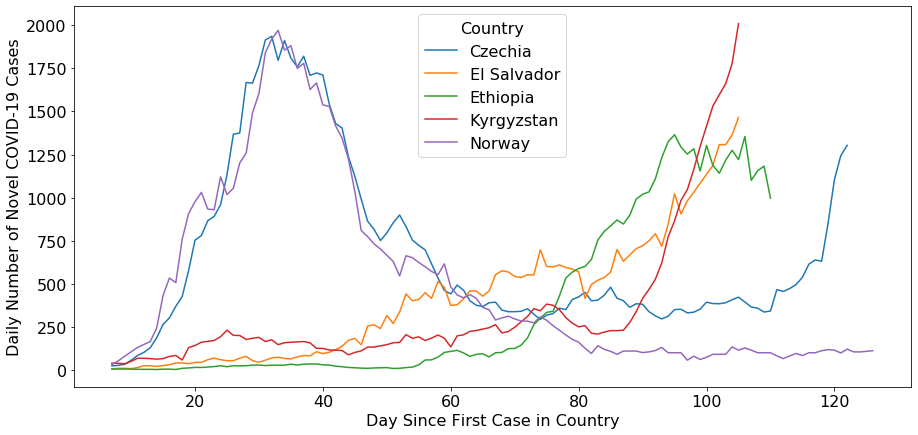

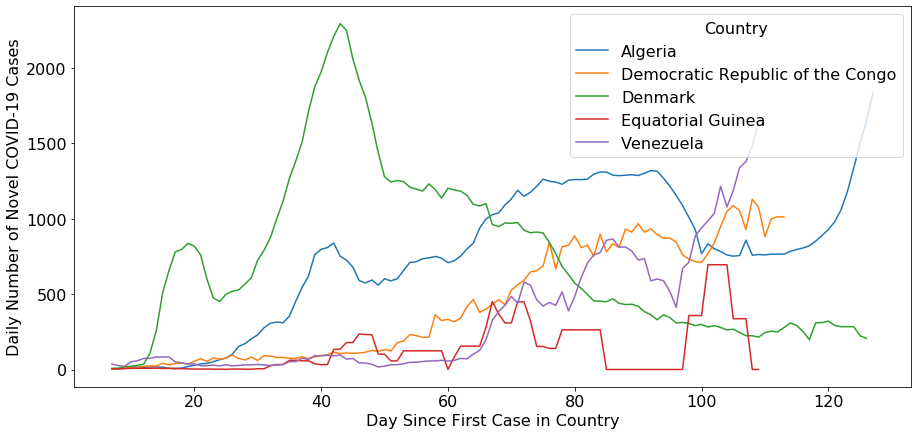

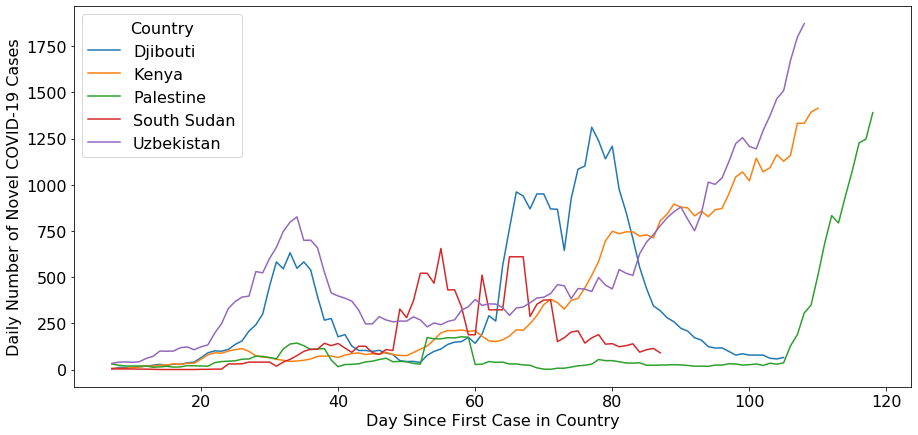

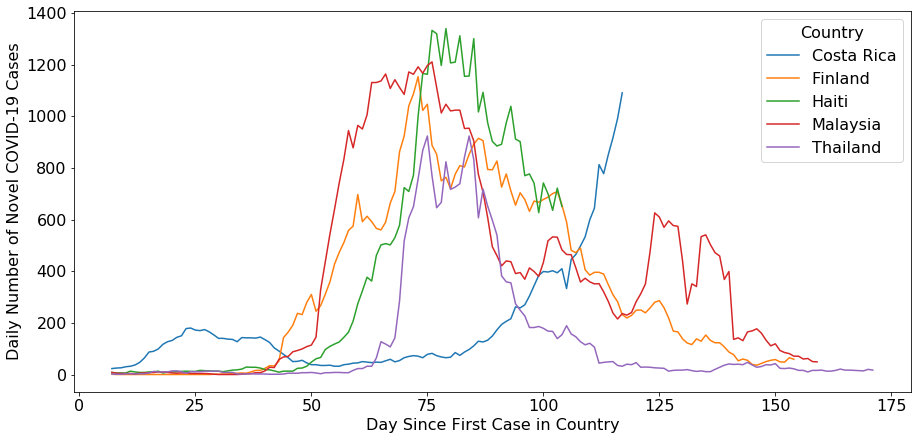

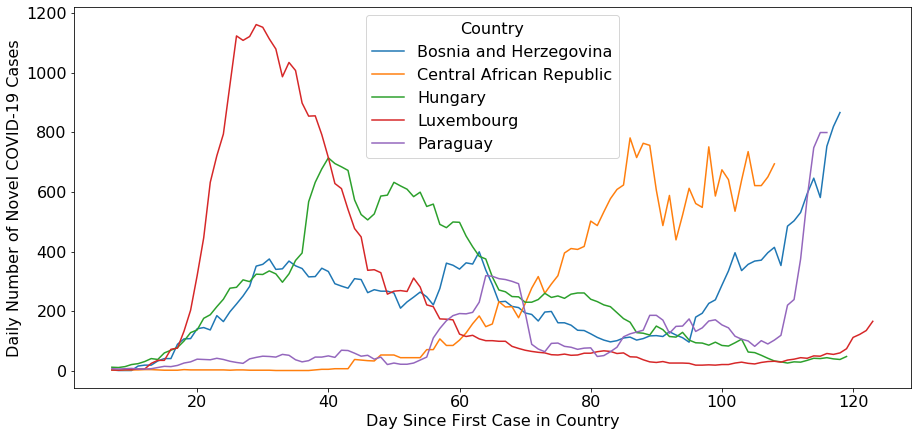

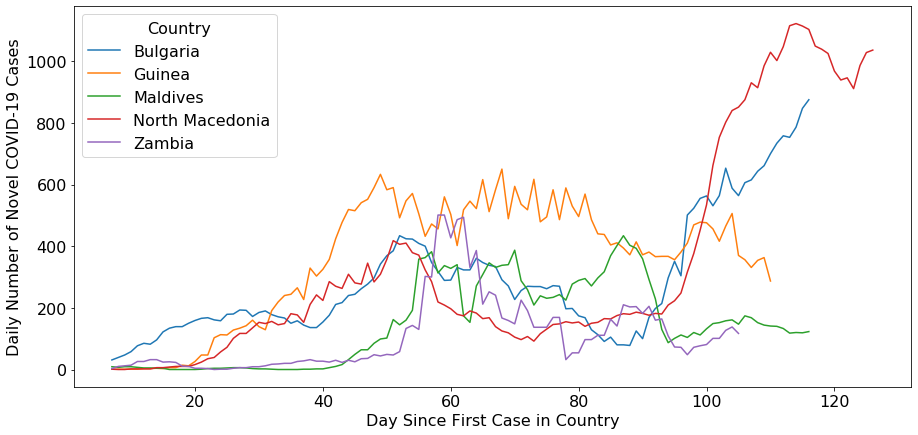

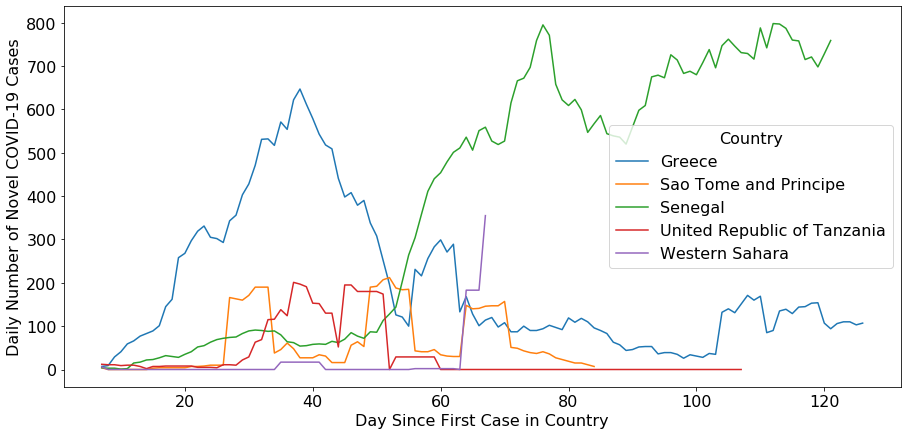

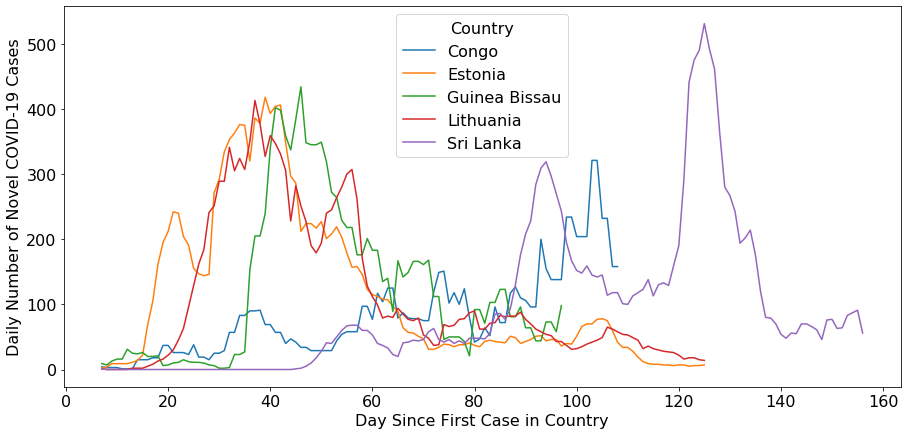

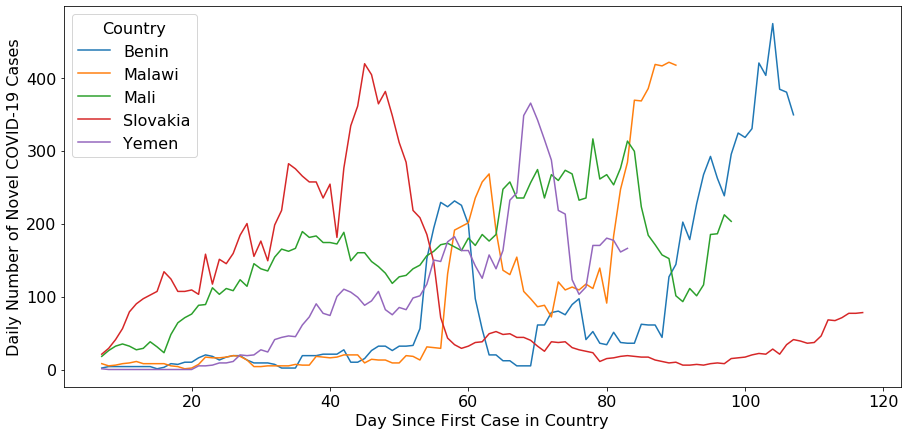

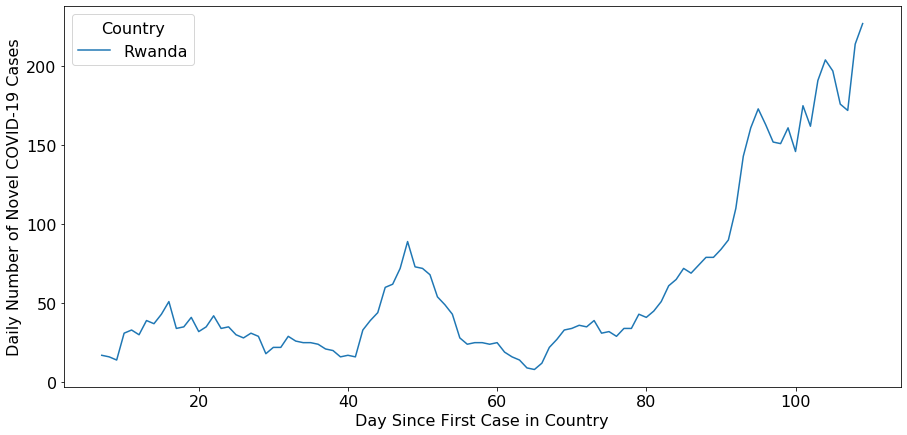

In [60]:
data = readCOVID19('COVID-19_cases_20200702.csv', cases_max=100)
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16})
plot5(moving_sum(data, 7))

## Coarse Grid Search

In [60]:
import pandas as pd
coarse = pd.read_csv('opt_preprocess_estimate_ENe_O_coarse.csv')
coarse.columns = ['n-day Average', 'Number of Averages', 'Der', 'Sta', 'R2', 'Tim', 'nTrain']
coarse

,n-day Average,Number of Averages,Der,Sta,R2,Tim,nTrain
0,7,1,False,False,-0.346355,0.438692,1686
1,7,2,False,False,0.143138,0.479661,1565
2,7,3,False,False,0.223995,0.581592,1444
3,7,4,False,False,0.196137,0.545616,1324
4,7,5,False,False,0.176812,0.561604,1204
5,7,6,False,False,0.185073,0.576644,1087
6,7,7,False,False,0.197168,0.579594,971
7,7,8,False,False,0.476822,0.577592,856
8,7,9,False,False,0.602866,0.614570,743
9,14,1,False,False,-7.040840,0.313776,766


## Fine Grid Search

In [61]:
fine = pd.read_csv('opt_preprocess_estimate_ENe_O_fine.csv')
fine.columns = ['n-day Average', 'Number of Averages', 'Der', 'Sta', 'R2', 'Tim', 'nTrain']
fine

,n-day Average,Number of Averages,Der,Sta,R2,Tim,nTrain
0,1,1,False,False,0.303748,8.684901,12537
1,1,2,False,False,0.536403,11.952753,12350
2,1,3,False,False,0.590850,17.241070,12191
3,1,4,False,False,0.612642,20.304691,12043
4,1,5,False,False,0.616901,27.041586,11903
...,...,...,...,...,...,...,...
212,13,7,False,False,0.732103,1.554214,165
213,13,8,False,False,-0.366943,1.552723,85
214,13,9,False,False,-22.890984,1.539949,47
215,13,10,False,False,-30.374089,1.413179,26


In [62]:
coarse = coarse.pivot('n-day Average', 'Number of Averages', 'R2')
coarse[coarse < 0] = 0
coarse = coarse.fillna(0)
fine = fine.pivot('n-day Average', 'Number of Averages', 'R2')
fine[fine < 0] = 0
fine = fine.fillna(0)

In [63]:
coarse

Number of Averages,1,2,3,4,5,6,7,8,9
n-day Average,,,,,,,,,
7,0.0,0.143138,0.223995,0.196137,0.176812,0.185073,0.197168,0.476822,0.602866
14,0.0,0.000000,0.000000,0.000000,0.000000,0.619998,0.471095,0.000000,0.000000
21,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
28,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
35,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
42,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
49,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
56,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [64]:
fine

Number of Averages,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
n-day Average,,,,,,,,,,,,,,,,,,,
1,0.303748,0.536403,0.590850,0.612642,0.616901,0.596744,0.574813,0.588304,0.611761,0.610993,0.589994,0.580838,0.584442,0.587550,0.586548,0.584637,0.580446,0.559548,0.552873
2,0.459827,0.582727,0.543089,0.558257,0.610841,0.588270,0.602541,0.601790,0.580856,0.598100,0.592874,0.588821,0.582783,0.597087,0.606806,0.578917,0.563218,0.541069,0.543764
3,0.365215,0.435596,0.555758,0.520593,0.519797,0.504641,0.547957,0.528192,0.512788,0.517101,0.494729,0.518352,0.547496,0.553751,0.603349,0.574454,0.550719,0.553858,0.561608
4,0.406853,0.332199,0.412948,0.287742,0.394620,0.335053,0.373294,0.279681,0.314847,0.384602,0.452238,0.413027,0.400441,0.395751,0.527070,0.582703,0.663765,0.654673,0.607990
5,0.302015,0.444377,0.412948,0.403150,0.383575,0.389551,0.344263,0.335424,0.494747,0.505240,0.521304,0.647184,0.684381,0.764784,0.764035,0.782144,0.823389,0.814169,0.814218
6,0.071131,0.358364,0.411469,0.414735,0.417233,0.371537,0.473380,0.492612,0.611273,0.690230,0.782782,0.766070,0.817536,0.848435,0.834927,0.787155,0.354395,0.000000,0.000000
7,0.000000,0.143138,0.223995,0.196137,0.176812,0.185073,0.197168,0.476822,0.602866,0.695421,0.725646,0.820304,0.817087,0.693570,0.614571,0.635272,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.322467,0.482525,0.707364,0.691993,0.841193,0.814031,0.702875,0.778054,0.516364,0.036019,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.350059,0.422739,0.775168,0.796906,0.869806,0.385424,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


Text(0.5, 1, 'Coarse 5-fold Cross-validation Search (R^2)')

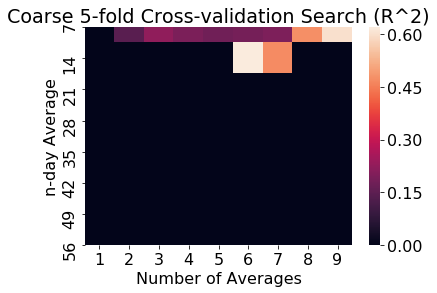

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16})
ax = sns.heatmap(coarse)
ax.set_title('Coarse 5-fold Cross-validation Search (R^2)')

Text(0.5, 1, 'Fine 5-fold Cross-validation Search (R^2)')

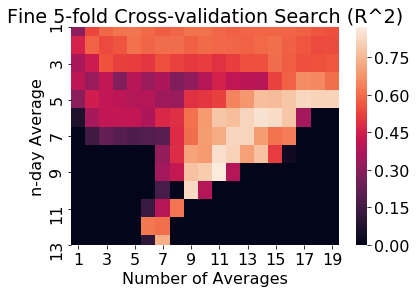

In [66]:
ax = sns.heatmap(fine)
ax.set_title('Fine 5-fold Cross-validation Search (R^2)')

## Optimize hypers

In [69]:
# get data
samples = {}
samples['p1'] = prepare_MLA(data, window_size=9, lags=11, sample_name='p1'
                            ,outputs=1, label_type='next', deriv=False, end_date=pd.to_datetime('6/20/2020'))
optimize_hypers('estimate', samples, '_A', mlas = ['ENe'])

on sample p1
ON MLA ENe
[0, True] [0.97587943 0.84833747 0.86416998 0.88281925 0.81451062]
[0, False] [0.97815603 0.84896832 0.87059235 0.88051392 0.84593325]
[0.2, True] [0.97587959 0.84833749 0.86416988 0.88281933 0.81451187]
[0.2, False] [0.97815616 0.84896834 0.87059226 0.88051399 0.84593382]
[0.5, True] [0.97587982 0.84833752 0.86416972 0.88281944 0.81451374]
[0.5, False] [0.97815636 0.84896838 0.87059212 0.8805141  0.84593467]
[0.8, True] [0.97588006 0.84833756 0.86416957 0.88281956 0.81451562]
[0.8, False] [0.97815655 0.84896843 0.87059197 0.88051421 0.84593553]
[1.0, True] [0.97588022 0.84833758 0.86416947 0.88281964 0.81451686]
[1.0, False] [0.97815668 0.84896845 0.87059188 0.88051428 0.84593609]
